a benchmark test in my laptop

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               142
Model name:          Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz


In [1]:
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt
from pystem.stemsegmentation import segmentationSTEM

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
image = np.load('FeNb_phase_boundary.npy')

In [5]:
step = 40

In [6]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM( n_patterns=2,
                       window_x=150,window_y=150,
                       patch_x=150,patch_y=150,
                       step=step,
                       descriptor_name=descriptor_name,
                       max_num_points = 100,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

method: direct
time_cost:   1.47[s]


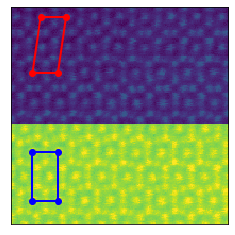

In [7]:
plt.imshow(labels+0.5*image)
plt.xticks([])
plt.yticks([])
plt.plot([140],[48],'ro',markersize=6)
plt.plot([260],[48],'ro',markersize=6)
#plt.plot([140],[190],'ro',markersize=6)
#plt.plot([260],[190],'ro',markersize=6)
plt.plot([102],[310],'ro',markersize=6)
plt.plot([222],[310],'ro',markersize=6)

plt.plot([140,102],[48,310],color='r',linewidth=2)
plt.plot([140,260],[48,48],color='r',linewidth=2)

plt.plot([260,222],[48,310],color='r',linewidth=2)
plt.plot([102,222],[310,310],color='r',linewidth=2)


plt.plot([102],[685],'bo',markersize=6)
plt.plot([222],[685],'bo',markersize=6)
#plt.plot([62],[800],'bo',markersize=6)
#plt.plot([172],[800],'bo',markersize=6)
plt.plot([102],[915],'bo',markersize=6)
plt.plot([222],[915],'bo',markersize=6)

plt.plot([102,222],[685,685],color='b',linewidth=2)
plt.plot([222,222],[685,915],color='b',linewidth=2)
plt.plot([222,102],[915,915],color='b',linewidth=2)
plt.plot([102,102],[685,915],color='b',linewidth=2)

([], <a list of 0 Text yticklabel objects>)

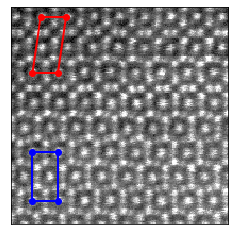

In [8]:
plt.imshow(image[:,:],cmap='gray')
plt.plot([140],[48],'ro',markersize=6)
plt.plot([260],[48],'ro',markersize=6)
#plt.plot([140],[190],'ro',markersize=6)
#plt.plot([260],[190],'ro',markersize=6)
plt.plot([102],[310],'ro',markersize=6)
plt.plot([222],[310],'ro',markersize=6)

plt.plot([140,102],[48,310],color='r',linewidth=2)
plt.plot([140,260],[48,48],color='r',linewidth=2)

plt.plot([260,222],[48,310],color='r',linewidth=2)
plt.plot([102,222],[310,310],color='r',linewidth=2)

#plt.plot([102],[450],'ro',markersize=6)
#plt.plot([222],[450],'ro',markersize=6)
#plt.plot([62],[570],'ro',markersize=6)
#plt.plot([172],[570],'ro',markersize=6)


plt.plot([102],[685],'bo',markersize=6)
plt.plot([222],[685],'bo',markersize=6)
#plt.plot([62],[800],'bo',markersize=6)
#plt.plot([172],[800],'bo',markersize=6)
plt.plot([102],[915],'bo',markersize=6)
plt.plot([222],[915],'bo',markersize=6)

plt.plot([102,222],[685,685],color='b',linewidth=2)
plt.plot([222,222],[685,915],color='b',linewidth=2)
plt.plot([222,102],[915,915],color='b',linewidth=2)
plt.plot([102,102],[685,915],color='b',linewidth=2)
#plt.plot([62],[1023],'bo',markersize=6)
#plt.plot([172],[1023],'bo',markersize=6)

plt.plot()
plt.xticks([])
plt.yticks([])

In [9]:
step = 10
window_x = 150
window_y = 150

In [10]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM( n_patterns=2,
                       window_x=window_x,window_y=window_y,
                       patch_x=150,patch_y=150,
                       step=step,
                       descriptor_name=descriptor_name,
                       max_num_points = 100,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

method: direct
time_cost:  14.88[s]


In [11]:
descriptors = seg._descriptors

In [12]:
shape = descriptors.shape

In [13]:
descriptors = np.reshape(descriptors, (-1,shape[2]))

In [14]:
variance = np.var(descriptors, axis=0)

In [15]:
pca_features = seg._PCA_components

In [16]:
shape = pca_features.shape
pca_features = np.reshape(pca_features,(-1, shape[2]))

In [17]:
variance_pca = np.var(pca_features, axis=0)

In [18]:
descriptors = seg._descriptors
labels_kmeans= seg._kmeans.labels_
shape = seg._descriptors.shape
labels_kmeans = np.reshape(labels_kmeans,(shape[0],shape[1]))

In [19]:
labels_kmeans.shape

(43, 43)

In [20]:
indices = np.where(labels_kmeans==0)
descriptors_0 = descriptors[indices[0],indices[1],:]
shape = descriptors_0.shape
mean_0 = np.mean(descriptors_0,axis=0)

variance_0 = np.var(descriptors_0,axis=0)

indices = np.where(labels_kmeans==1)
descriptors_1 = descriptors[indices[0],indices[1],:]
shape = descriptors_1.shape
mean_1 = np.mean(descriptors_1,axis=0)
variance_1 = np.var(descriptors_1, axis=0)

shape = descriptors.shape
mean_tot = np.mean(np.reshape(descriptors,(-1,shape[2])),axis=0)
up = len(descriptors_0)*(mean_0-mean_tot)**2 + len(descriptors_1)*(mean_1-mean_tot)**2
down = len(descriptors_0)*variance_0 + len(descriptors_1)*variance_1
separability = up/down

In [21]:
separability.shape

(100,)

In [22]:
pca_features.shape

(1849, 5)

In [23]:
shape = descriptors.shape

In [24]:
pca_features = np.reshape(pca_features, (shape[0],shape[1],-1))

In [25]:
indices = np.where(labels_kmeans==0)
descriptors_0 = pca_features[indices[0],indices[1],:]
shape = descriptors_0.shape
mean_0 = np.mean(descriptors_0,axis=0)

variance_0 = np.var(descriptors_0,axis=0)

indices = np.where(labels_kmeans==1)
descriptors_1 = pca_features[indices[0],indices[1],:]
shape = descriptors_1.shape
mean_1 = np.mean(descriptors_1,axis=0)
variance_1 = np.var(descriptors_1, axis=0)

shape = pca_features.shape
mean_tot = np.mean(np.reshape(pca_features,(-1,shape[2])),axis=0)
up = len(descriptors_0)*(mean_0-mean_tot)**2 + len(descriptors_1)*(mean_1-mean_tot)**2
down = len(descriptors_0)*variance_0 + len(descriptors_1)*variance_1
separability_pca = up/down

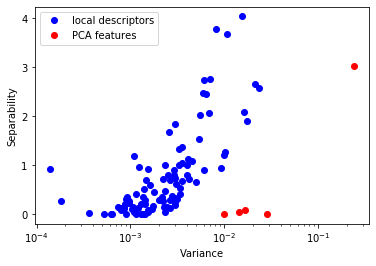

In [26]:
plt.plot(variance, separability,'bo',label='local descriptors')
plt.plot(variance_pca,separability_pca, 'ro',label='PCA features')
plt.xscale('log')
plt.yticks([0,1,2,3,4])
plt.xlabel('Variance')
plt.ylabel('Separability')
plt.legend(loc='upper left')

In [29]:
step = 40

In [27]:
descriptor_name = 'power_spectrum'
seg = segmentationSTEM( n_patterns=2,
                       window_x=150,window_y=150,
                       step=step,
                       descriptor_name=descriptor_name,
                       power_spectrum_logarithm=False,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   3.80[s]


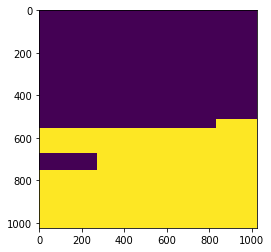

In [28]:
plt.imshow(labels)

In [79]:
descriptor_name = 'reflection_symmetry_maximums'
seg = segmentationSTEM(n_patterns=2,
                       window_x=150,window_y=150,
                       radius=150,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   4.31[s]


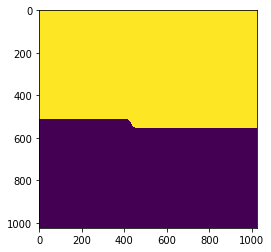

In [80]:
plt.imshow(labels)

In [7]:
descriptor_name = 'rotational_symmetry_maximums'
seg = segmentationSTEM( n_patterns=2,   #       rotational symmetry can only differentiate the grain boundary and the matrix
                       window_x=150,window_y=150,
                       radius=150,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:  34.33[s]


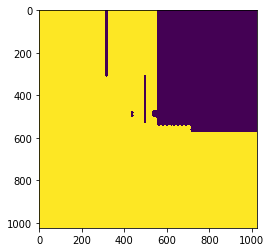

In [8]:
plt.imshow(labels)